# Can AI predict Oscar Winners? - INFO 5871 Web Data Science
For this project I will be trying to figure out can we predict the best picture winner using Oscar Movie Data?

The data for this project was collected through multiple differnet methods. First, using a Selenium driver I searched for all the [Oscar](https://awardsdatabase.oscars.org) 'Best Picture' nominees and winners since 2000. From there I used [The Movie Database API](https://developer.themoviedb.org/docs) to collect some more information about each movie. Finally, using Selenium once more, I collected all the [Rotten Tomatoes](https://www.rottentomatoes.com) rating from both the audience and the critics. Together we have a useable dataset to answer our research questions.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pd.options.display.max_columns = 200
pd.options.display.float_format = '{:,}'.format

In [2]:
oscar_df = pd.read_csv("oscars.csv")
oscar_df

,Unnamed: 0,year,award year,movie,producers,winner,TMDB_id,imdb_id,budget,revenue,popularity,genre,adult,production_companies,release_date,vote_average,runtime(mins),average_rating_c,liked_count_c,not_liked_count_c,rating_count_c,state_c,value_c,average_rating_a,liked_count_a,not_liked_count_a,rating_count_a,review_count_a,value_a
0,0,2000,(73rd),Chocolat,"David Brown, Kit Golden and Leslie Holleran",False,392,tt0241303,25000000,152500343,16.956,Comedy,False,"['Fat Free', 'Miramax', 'David Brown Productio...",2000-12-22,7.0,121,6.0,75.0,44.0,119.0,fresh,63.0,4.0,35771,7232,329145,13002,83
1,1,2000,(73rd),"Crouching Tiger, Hidden Dragon","Bill Kong, Hsu Li Kong and Ang Lee",False,146,tt0190332,17000000,213525736,24.728,Adventure,False,"['China Film Co-Production Corporation', 'Colu...",2000-07-06,7.41,120,8.7,166.0,4.0,170.0,certified-fresh,98.0,4.1,29180,4725,427892,13700,86
2,2,2000,(73rd),Erin Brockovich,"Danny DeVito, Michael Shamberg and Stacey Sher",False,462,tt0195685,52000000,256271286,23.903,Drama,False,['Jersey Films'],2000-03-17,7.42,131,7.5,127.0,23.0,150.0,certified-fresh,85.0,3.9,13393,3174,418943,8239,81
3,3,2000,(73rd),Gladiator,"Douglas Wick, David Franzoni and Branko Lustig",True,98,tt0172495,103000000,465361176,63.604,Action,False,"['Universal Pictures', 'Scott Free Productions...",2000-05-04,8.21,155,7.4,205.0,52.0,257.0,certified-fresh,80.0,3.8,170538,24401,34128168,1652336,87
4,4,2000,(73rd),Traffic,"Edward Zwick, Marshall Herskovitz and Laura Bi...",False,1900,tt0181865,48000000,207515725,22.661,Thriller,False,"['USA Films', 'Compulsion Inc.', 'Initial Ente...",2000-12-27,7.051,147,NaN,NaN,NaN,NaN,NaN,NaN,3.8,170538,24401,34128168,1652336,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,166,2022,(95th),The Fabelmans,"Kristie Macosko Krieger, Steven Spielberg and ...",False,804095,tt14208870,40000000,45629909,48.037,Drama,False,"['Amblin Entertainment', 'Reliance Entertainme...",2022-11-11,7.71,151,8.2,359.0,31.0,390.0,certified-fresh,92.0,4.2,1271,265,1536,726,83
167,167,2022,(95th),Tár,"Todd Field, Alexandra Milchan and Scott Lambert",False,817758,tt14444726,35000000,29000000,37.083,Drama,False,"['Focus Features', 'Standard Film Company', 'E...",2022-09-23,7.1,158,8.3,315.0,33.0,348.0,certified-fresh,91.0,3.9,336,121,457,222,74
168,168,2022,(95th),Top Gun: Maverick,"Tom Cruise, Christopher McQuarrie, David Ellis...",False,361743,tt1745960,170000000,1488732821,233.234,Action,False,"['Skydance', 'Don Simpson/Jerry Bruckheimer Fi...",2022-05-24,8.246,131,8.2,456.0,20.0,476.0,certified-fresh,96.0,4.9,62970,783,63753,29698,99
169,169,2022,(95th),Triangle of Sadness,Erik Hemmendorff and Philippe Bober,False,497828,tt7322224,15600000,24733572,38.089,Comedy,False,"['30WEST', 'BBC Film', 'Bord Cadre Films', 'Co...",2022-09-18,7.115,147,7.2,199.0,77.0,276.0,fresh,72.0,4.0,153,39,192,71,80


In [3]:
oscar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            171 non-null    int64  
 1   year                  171 non-null    int64  
 2   award year            171 non-null    object 
 3   movie                 171 non-null    object 
 4   producers             171 non-null    object 
 5   winner                171 non-null    bool   
 6   TMDB_id               171 non-null    int64  
 7   imdb_id               171 non-null    object 
 8   budget                171 non-null    int64  
 9   revenue               171 non-null    int64  
 10  popularity            171 non-null    float64
 11  genre                 171 non-null    object 
 12  adult                 171 non-null    bool   
 13  production_companies  171 non-null    object 
 14  release_date          171 non-null    object 
 15  vote_average          1

In [4]:
# ML model to predict an oscar winner 

In [5]:
oscar_df.columns

Index(['Unnamed: 0', 'year', 'award year', 'movie', 'producers', 'winner',
       'TMDB_id', 'imdb_id', 'budget', 'revenue', 'popularity', 'genre',
       'adult', 'production_companies', 'release_date', 'vote_average',
       'runtime(mins)', 'average_rating_c', 'liked_count_c',
       'not_liked_count_c', 'rating_count_c', 'state_c', 'value_c',
       'average_rating_a', 'liked_count_a', 'not_liked_count_a',
       'rating_count_a', 'review_count_a', 'value_a'],
      dtype='object')

In [6]:
oscar_df["ROI"] = oscar_df["revenue"] - oscar_df["budget"]
# oscar_df['genre_encoded'] = pd.factorize(oscar_df['genre'])[0]
genre_df = pd.get_dummies(oscar_df["genre"])
oscar_df["winner_encoded"] = pd.factorize(oscar_df['winner'])[0]
oscar_df = pd.concat([oscar_df,genre_df],axis=1)

cols = ['movie','budget', 'revenue','ROI','popularity','runtime(mins)','average_rating_c', 'average_rating_a',
        'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Drama','Fantasy', 'History', 'Music', 'Mystery', 
        'Romance', 'Science Fiction','Thriller', 'War', 'Western','winner_encoded']

oscar_cleaned = oscar_df[cols].copy()

In [7]:
oscar_cleaned.head(3)

,movie,budget,revenue,ROI,popularity,runtime(mins),average_rating_c,average_rating_a,Action,Adventure,Animation,Comedy,Crime,Drama,Fantasy,History,Music,Mystery,Romance,Science Fiction,Thriller,War,Western,winner_encoded
0,Chocolat,25000000,152500343,127500343,16.956,121,6.0,4.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,"Crouching Tiger, Hidden Dragon",17000000,213525736,196525736,24.728,120,8.7,4.1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Erin Brockovich,52000000,256271286,204271286,23.903,131,7.5,3.9,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [8]:
# Missing values?
oscar_cleaned.isna().apply(pd.value_counts)

,movie,budget,revenue,ROI,popularity,runtime(mins),average_rating_c,average_rating_a,Action,Adventure,Animation,Comedy,Crime,Drama,Fantasy,History,Music,Mystery,Romance,Science Fiction,Thriller,War,Western,winner_encoded
False,171.0,171.0,171.0,171.0,171.0,171.0,147,171.0,171.0,171.0,171.0,171.0,171.0,171.0,171.0,171.0,171.0,171.0,171.0,171.0,171.0,171.0,171.0,171.0
True,NaN,NaN,NaN,NaN,NaN,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
oscar_cleaned = oscar_cleaned.dropna()
oscar_cleaned.isna().apply(pd.value_counts)

,movie,budget,revenue,ROI,popularity,runtime(mins),average_rating_c,average_rating_a,Action,Adventure,Animation,Comedy,Crime,Drama,Fantasy,History,Music,Mystery,Romance,Science Fiction,Thriller,War,Western,winner_encoded
False,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147


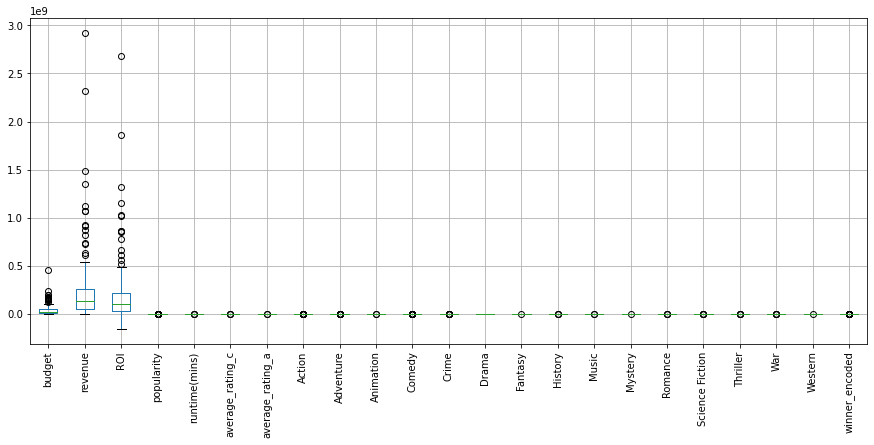

In [10]:
# Outliers?
oscar_cleaned.boxplot(figsize = (15,6)) # make boxplot to see outliers
plt.xticks(rotation=90)
plt.show()
# oscar_cleaned.describe().T

In [11]:
# I would argue that although some of the datapoints are outliers, they are important to keep in. 
# I will not remove them

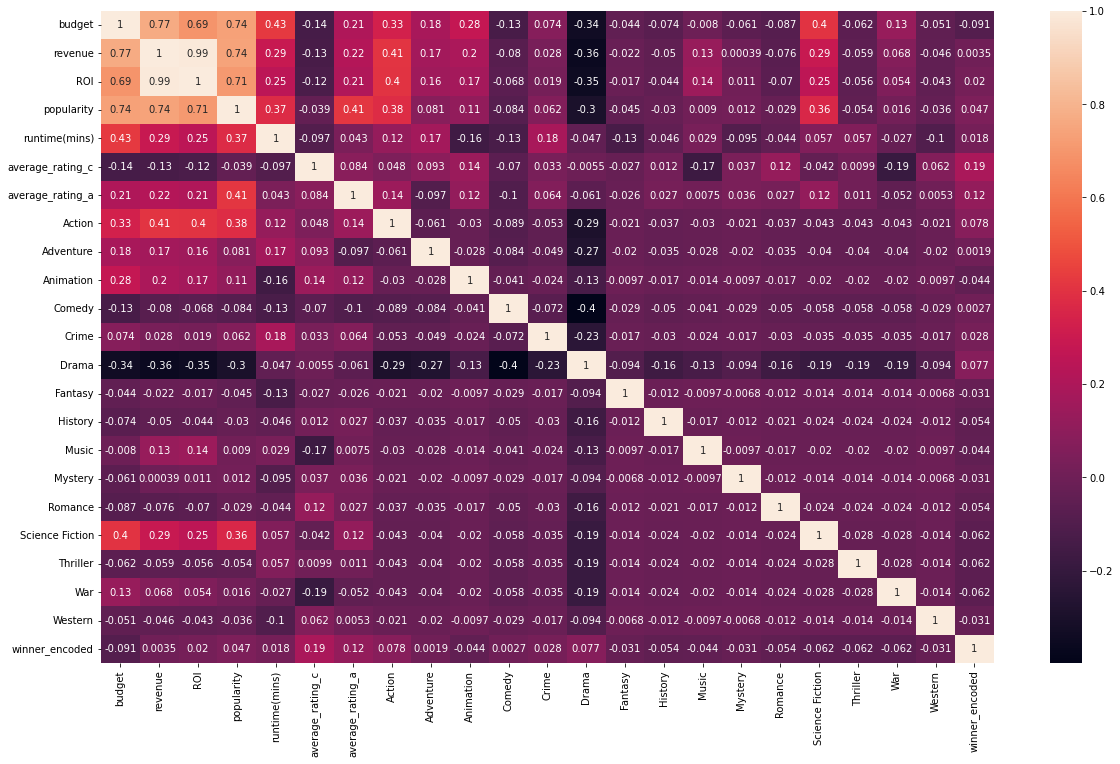

In [12]:
fig, ax = plt.subplots(figsize=(20,12))  
sns.heatmap(oscar_cleaned.corr(), annot = True,ax=ax)
plt.show()

In [13]:
# sns.clustermap(oscar_cleaned.corr(), annot = True)

In [14]:
# Standardize dataframe
from sklearn.preprocessing import StandardScaler
scaling_cols = oscar_cleaned.columns[1:8]
sc = StandardScaler()
oscar_cleaned[oscar_cleaned.columns[1:8]] = sc.fit_transform(oscar_cleaned[oscar_cleaned.columns[1:8]])

oscar_cleaned.head(3)

,movie,budget,revenue,ROI,popularity,runtime(mins),average_rating_c,average_rating_a,Action,Adventure,Animation,Comedy,Crime,Drama,Fantasy,History,Music,Mystery,Romance,Science Fiction,Thriller,War,Western,winner_encoded
0,Chocolat,-0.39060016919698776,-0.2612715592844535,-0.22714452419989203,-0.5965737223638392,-0.39588262612174685,-3.098137704929426,-0.3098323395543359,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,"Crouching Tiger, Hidden Dragon",-0.5264224117749395,-0.10352738710559169,-0.026314659767725592,-0.3940151012907789,-0.4404080630306197,1.060302792488527,0.06349023351523163,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Erin Brockovich,0.06779989950359962,0.006965328591956502,-0.003778927787864691,-0.4155167562554309,0.04937174296698162,-0.7878929841416737,-0.683154912623905,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [15]:
# extract features
X = oscar_cleaned.iloc[:,1:23] 
Y = oscar_cleaned.iloc[:,23]

print(X.shape)
print(Y.shape)

(147, 22)
(147,)


In [16]:
#  Split data into a training set and test set
#  Splitting data into 70% training and 30% test data:

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=2, stratify=Y)

In [18]:
print('Labels count in y:', np.bincount(Y))
print('Labels count in y_train:', np.bincount(y_train))
print('Labels count in y_test:', np.bincount(y_test))

print(X_train.shape)
print(X_test.shape)
# print(X_train)

Labels count in y: [129  18]
Labels count in y_train: [90 12]
Labels count in y_test: [39  6]
(102, 22)
(45, 22)


In [19]:
# Train Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [20]:
# model.coef_
coef_dict = {key: value for key, value in zip(cols[1:], model.coef_[0])}
# coef_dict
coef_df = pd.DataFrame([coef_dict]).T.reset_index()
coef_df.columns = ["Feature","Coef"]
coef_df.sort_values("Coef",ascending=False).head()
# showing which features are most important.

,Feature,Coef
7,Action,0.6544919258568669
5,average_rating_c,0.4998842243389388
10,Comedy,0.3420496823314155
12,Drama,0.31832027441572547
3,popularity,0.29752486676416645


In [21]:
coef_df.sort_values("Coef",ascending=False).tail()

,Feature,Coef
18,Science Fiction,-0.1395787978394835
11,Crime,-0.1774803674905874
19,Thriller,-0.21639118775012728
17,Romance,-0.25452378874675413
0,budget,-0.548009882764911


In [22]:
# Check model accuracy
from sklearn import metrics 
y_pred = model.predict(X_test)

In [23]:
# code from Applied Machine Learning
print('Accuracy: %.3f' % metrics.accuracy_score(y_true=y_test, y_pred=y_pred))
print('Precision: %.3f' % metrics.precision_score(y_true=y_test, y_pred=y_pred, zero_division=0))
print('Recall: %.3f' % metrics.recall_score(y_true=y_test, y_pred=y_pred, zero_division=0))

Accuracy: 0.867
Precision: 0.000
Recall: 0.000


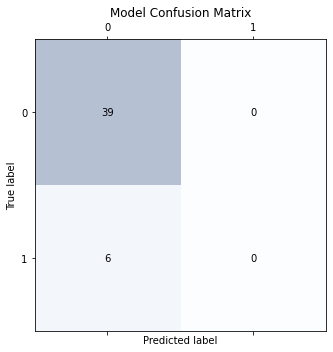

In [24]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.title("Model Confusion Matrix")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

In [25]:
# Data is unbalanced. Going to drop half the columns that are losers.
# Did not end up using this for the research paper

In [26]:
# Seperate the winners and the losers
winners_df = oscar_cleaned[oscar_cleaned["winner_encoded"] == 1]
losers_df = oscar_cleaned[oscar_cleaned["winner_encoded"] == 0]
winners_df.head(3)

,movie,budget,revenue,ROI,popularity,runtime(mins),average_rating_c,average_rating_a,Action,Adventure,Animation,Comedy,Crime,Drama,Fantasy,History,Music,Mystery,Romance,Science Fiction,Thriller,War,Western,winner_encoded
3,Gladiator,0.9336666959380424,0.5474405305954779,0.4561847145313628,0.6191950058677761,1.11798222877993,-0.9419092988608566,-1.0564774856934742,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,A Beautiful Mind,0.16966658143706348,0.16342563820407296,0.15487274754965025,1.0632758530710538,0.22747349060247302,-1.249941928299224,0.81013537965437,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
10,Chicago,-0.051044562752108225,0.13751655289614426,0.16353357015461378,-0.52398934772559,-0.7520861213927297,-0.017811410545756242,-0.3098323395543359,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [27]:
losers_df.head(3)

,movie,budget,revenue,ROI,popularity,runtime(mins),average_rating_c,average_rating_a,Action,Adventure,Animation,Comedy,Crime,Drama,Fantasy,History,Music,Mystery,Romance,Science Fiction,Thriller,War,Western,winner_encoded
0,Chocolat,-0.39060016919698776,-0.2612715592844535,-0.22714452419989203,-0.5965737223638392,-0.39588262612174685,-3.098137704929426,-0.3098323395543359,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,"Crouching Tiger, Hidden Dragon",-0.5264224117749395,-0.10352738710559169,-0.026314659767725592,-0.3940151012907789,-0.4404080630306197,1.060302792488527,0.06349023351523163,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Erin Brockovich,0.06779989950359962,0.006965328591956502,-0.003778927787864691,-0.4155167562554309,0.04937174296698162,-0.7878929841416737,-0.683154912623905,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [28]:
losers_sample = losers_df.sample(frac=0.5)
print(f"Original losers size: {len(losers_df)}")
print(f"New losers size: {len(losers_sample)}")
losers_sample.head(3)

Original losers size: 129
New losers size: 64


,movie,budget,revenue,ROI,popularity,runtime(mins),average_rating_c,average_rating_a,Action,Adventure,Animation,Comedy,Crime,Drama,Fantasy,History,Music,Mystery,Romance,Science Fiction,Thriller,War,Western,winner_encoded
88,Nebraska,-0.6113113133861594,-0.5838672170325817,-0.5524284052805793,-0.7209966324259582,-0.663035247574984,-0.017811410545756242,-0.3098323395543359,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
94,Boyhood,-0.7471335559641112,-0.5310380168267252,-0.4696888168577039,-0.5427544284220135,1.6077620347775312,1.8303843660844445,-0.3098323395543359,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
156,King Richard,0.03384433885911166,-0.5535482586184188,-0.6288632345902232,-0.290468343503431,0.6727278596912015,-0.6338766694224908,2.3034256719326467,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [29]:
reduced_oscar_df = pd.concat([winners_df,losers_sample]).reset_index().drop(columns="index")
reduced_oscar_df.head(3)

,movie,budget,revenue,ROI,popularity,runtime(mins),average_rating_c,average_rating_a,Action,Adventure,Animation,Comedy,Crime,Drama,Fantasy,History,Music,Mystery,Romance,Science Fiction,Thriller,War,Western,winner_encoded
0,Gladiator,0.9336666959380424,0.5474405305954779,0.4561847145313628,0.6191950058677761,1.11798222877993,-0.9419092988608566,-1.0564774856934742,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,A Beautiful Mind,0.16966658143706348,0.16342563820407296,0.15487274754965025,1.0632758530710538,0.22747349060247302,-1.249941928299224,0.81013537965437,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,Chicago,-0.051044562752108225,0.13751655289614426,0.16353357015461378,-0.52398934772559,-0.7520861213927297,-0.017811410545756242,-0.3098323395543359,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [30]:
reduced_oscar_df["winner_encoded"].value_counts()

0    64
1    18
Name: winner_encoded, dtype: int64

In [31]:
# Retrain model

In [32]:
# extract features
X = reduced_oscar_df.iloc[:,1:25] 
Y = reduced_oscar_df.iloc[:,25]

print(X.shape)
print(Y.shape)

IndexError: single positional indexer is out-of-bounds

In [ ]:
# 2. Split data into a training set and test set
#    Splitting data into 70% training and 30% test data:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=2, stratify=Y)

In [ ]:
print('Labels count in y:', np.bincount(Y))
print('Labels count in y_train:', np.bincount(y_train))
print('Labels count in y_test:', np.bincount(y_test))

print(X_train.shape)
print(X_test.shape)
# print(X_train)

In [ ]:
# Train Model
model1 = LogisticRegression()
model1.fit(X_train, y_train)

In [ ]:
# model.coef_
coef_dict1 = {key: value for key, value in zip(cols[1:], model1.coef_[0])}
coef_dict1
# showing which features are most important.

In [ ]:
# Check model accuracy
y_pred = model1.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

In [ ]:
confmat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.title("Balanced Model Confusion Matrix")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

In [ ]:
# Comparing the two models coefs
combined_dict = {key: [coef_dict.get(key, None), coef_dict1.get(key, None)] for key in set(coef_dict) | set(coef_dict1)}
df = pd.DataFrame(combined_dict).T
df.columns = ["Model Coefs","Balanced Model Coefs"]
df["Coef Diff"] = abs(df["Balanced Model Coefs"] - df["Model Coefs"])
df

In [ ]:
df.sort_values("Model Coefs")